In [9]:
# Import dan fungsi tampil gambar

import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_rgb(img):
    """
    Fungsi untuk menampilkan gambar BGR → RGB.
    OpenCV = BGR, matplotlib = RGB.
    """
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')


Ukuran foto 1: (650, 650, 3)
Ukuran foto 2: (1307, 736, 3)


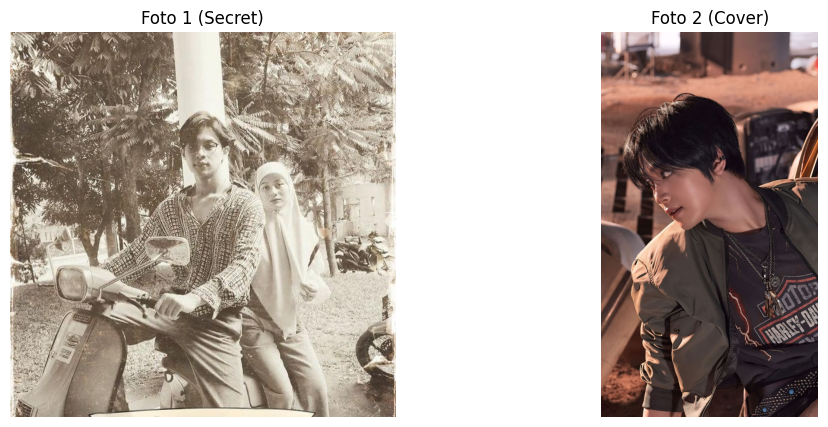

In [10]:
# Load gambar secret dan cover

# Path file gambar (sesuaikan dengan folder kamu)
path_foto1 = "gambar/foto1.jpeg"   # foto pola rahasia
path_foto2 = "gambar/hc2.jpg"      # foto yang akan dimanipulasi (cover)

# Membaca gambar menggunakan OpenCV
img1 = cv2.imread(path_foto1)      # baca foto secret
img2 = cv2.imread(path_foto2)      # baca foto cover

# Cek apakah gambar ditemukan dengan benar
if img1 is None or img2 is None:
    raise FileNotFoundError("Cek ulang nama path gambarnya bro. Salah nih.")

# Cetak ukuran gambar
print("Ukuran foto 1:", img1.shape)
print("Ukuran foto 2:", img2.shape)

# Tampilkan gambar secara horizontal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
show_rgb(img1)
plt.title("Foto 1 (Secret)")

plt.subplot(1, 2, 2)
show_rgb(img2)
plt.title("Foto 2 (Cover)")

plt.show()


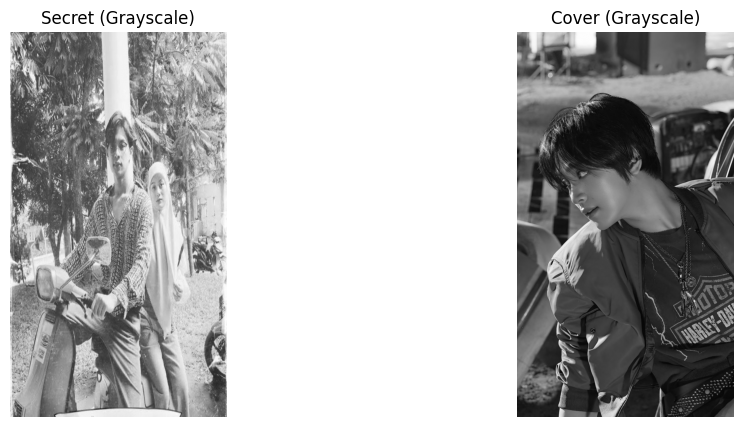

In [11]:
#M enyamakan ukuran dan mengubah ke grayscale

# Ambil ukuran dari foto cover
h2, w2 = img2.shape[:2]

# Resize foto secret agar ukurannya sama dengan cover
img1_resize = cv2.resize(img1, (w2, h2))

# Ubah kedua gambar menjadi grayscale
gray_secret = cv2.cvtColor(img1_resize, cv2.COLOR_BGR2GRAY)
gray_cover  = cv2.cvtColor(img2,        cv2.COLOR_BGR2GRAY)

# Tampilkan hasil secara horizontal
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_secret, cmap='gray')
plt.title("Secret (Grayscale)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_cover, cmap='gray')
plt.title("Cover (Grayscale)")
plt.axis('off')

plt.show()


Nilai unik cover_bits: [0 1]


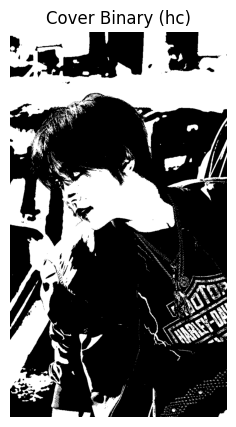

In [13]:
# Cell 4: Convert FOTO COVER (hc) menjadi citra biner — bukan foto secret

# Threshold otomatis pakai Otsu
_, cover_bin_255 = cv2.threshold(
    gray_cover, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# Ubah 0/255 ke 0/1 (biar bisa dipakai operasi logika nanti)
cover_bits = cover_bin_255 // 255

# Tampilkan nilai unik (0 dan 1)
print("Nilai unik cover_bits:", np.unique(cover_bits))

# TAMPILKAN FOTO COVER BINER (hc)
plt.figure(figsize=(6,5))
plt.imshow(cover_bin_255, cmap='gray')
plt.title("Cover Binary (hc)")
plt.axis('off')
plt.show()


In [14]:
#  Mengambil LSB dari cover dan lakukan operasi logika

# Ambil bit LSB (Least Significant Bit) dari cover
cover_lsb = gray_cover & 1     # hasilnya 0/1

# Lakukan operasi logika bitwise antara cover LSB dan secret
lsb_and = cover_lsb & secret_bits   # operator AND
lsb_or  = cover_lsb | secret_bits   # operator OR
lsb_xor = cover_lsb ^ secret_bits   # operator XOR

# Cek nilai unik tiap hasil
print("Nilai unik AND:", np.unique(lsb_and))
print("Nilai unik OR :", np.unique(lsb_or))
print("Nilai unik XOR:", np.unique(lsb_xor))


Nilai unik AND: [0 1]
Nilai unik OR : [0 1]
Nilai unik XOR: [0 1]


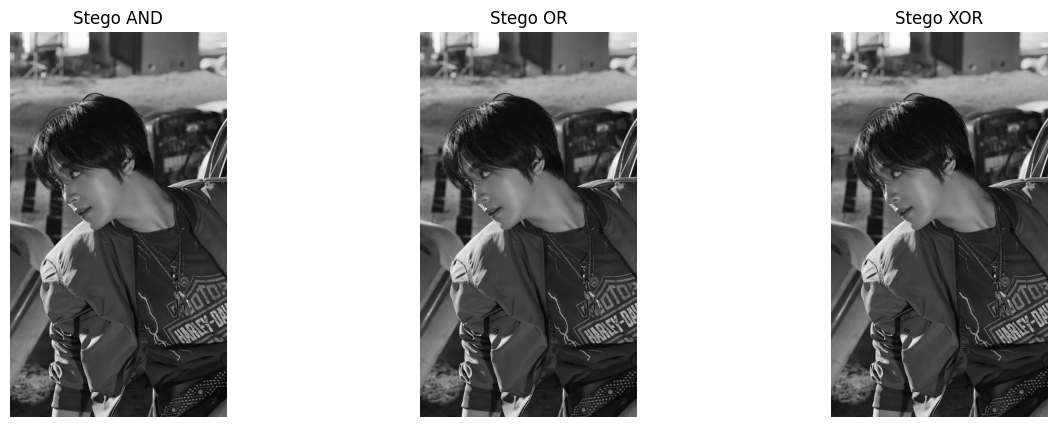

In [15]:
#  Menyisipkan hasil logika ke dalam LSB cover

def embed_lsb(base_gray, new_lsb):
    """
    base_gray = gambar grayscale asli
    new_lsb = pola bit 0/1 yang ingin disisipkan ke LSB
    """
    base_no_lsb = base_gray & 254      # membuat LSB menjadi 0 (00000000xxxxxx0)
    stego = base_no_lsb | new_lsb      # isi ulang bit terakhir
    return stego.astype(np.uint8)

# Buat 3 gambar stego
stego_and = embed_lsb(gray_cover, lsb_and)
stego_or  = embed_lsb(gray_cover, lsb_or)
stego_xor = embed_lsb(gray_cover, lsb_xor)

# Tampilkan hasil secara horizontal
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(stego_and, cmap='gray')
plt.title("Stego AND")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(stego_or, cmap='gray')
plt.title("Stego OR")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(stego_xor, cmap='gray')
plt.title("Stego XOR")
plt.axis('off')

plt.show()


In [21]:
# Ekstraksi secret dari gambar stego
# --------------------------------------------------------
# Tujuan:
# - Mengecek apakah gambar stego sudah ada di memory (variabel)
# - Jika ada, lakukan proses ekstraksi LSB
# - Meniru struktur coding pada screenshot yang lo kirim
# --------------------------------------------------------

# Cek apakah variabel 'stego_xor' sudah dibuat di cell sebelumnya
if 'stego_xor' in locals():

    # Ekstraksi secret: ambil pola dari LSB stego
    # extract_pattern = fungsi yang sudah dibuat sebelumnya untuk mengambil LSB
    extracted_secret = extract_pattern(stego_xor)

    # Beri notifikasi kalau ekstraksi sukses
    print("Ekstraksi secret berhasil.")

else:
    # Jika variabelnya belum ada → belum ada proses embed
    print("Gambar stego belum ada.")


Ekstraksi secret berhasil.


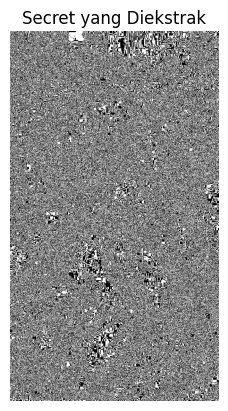

In [22]:
# Menampilkan secret hasil ekstraksi
# --------------------------------------------------------
# Tujuan:
# - Menampilkan gambar secret hasil ekstraksi dalam format sederhana
# - Gaya tampilan ini disamakan dengan screenshot lo (tanpa subplot, simple)
# --------------------------------------------------------

# Cek apakah hasil ekstraksi sudah ada
if 'extracted_secret' in locals():

    # Tampilkan gambar hasil ekstraksi dalam skala grayscale
    plt.imshow(extracted_secret, cmap='gray')

    # Tambahkan judul sesuai screenshot
    plt.title('Secret yang Diekstrak')

    # Hilangkan axis biar rapi
    plt.axis('off')

    # Tampilkan gambar
    plt.show()

else:
    # Jika secret belum diekstrak
    print("Secret belum diekstrak.")


In [23]:
# Menyimpan file stego & secret hasil ekstraksi
# --------------------------------------------------------
# Tujuan:
# - Menyimpan gambar hasil steganografi & hasil ekstraksi
# - Mengikuti struktur kode screenshot lo (simple print)
# - Disimpan dalam folder 'gambar/' sesuai permintaan sebelumnya
# --------------------------------------------------------

# Jika stego tersedia → simpan ke folder
if 'stego_xor' in locals():

    # Path untuk menyimpan stego di folder 'gambar'
    output_stego = "gambar/stego_image.jpg"

    # Simpan file dengan OpenCV
    cv2.imwrite(output_stego, stego_xor)

    # Notifikasi
    print(f"Gambar stego disimpan sebagai: {output_stego}")

# Jika secret hasil ekstraksi ada → simpan juga
if 'extracted_secret' in locals():

    output_secret = "gambar/secret_extracted.jpg"

    # Simpan file secret
    cv2.imwrite(output_secret, extracted_secret)

    # Notifikasi
    print(f"Secret diekstrak disimpan sebagai: {output_secret}")

else:
    # Kalau tidak ada file untuk disimpan
    print("Tidak ada gambar untuk disimpan.")


Gambar stego disimpan sebagai: gambar/stego_image.jpg
Secret diekstrak disimpan sebagai: gambar/secret_extracted.jpg
